In [3]:
import torchvision 
from torchvision.datasets import MNIST

## importing dataset

In [4]:
import torchvision.transforms as transforms

In [7]:
train_dataset = MNIST(root = "data/", download = True, 
                 train = True, 
                transform = transforms.ToTensor())
test_dataset = MNIST(root = "data/", download = True, 
                 train = False, 
                transform = transforms.ToTensor())

Using downloaded and verified file: data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Using downloaded and verified file: data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Using downloaded and verified file: data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Using downloaded and verified file: data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


## exploring the data

In [9]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

label:  5


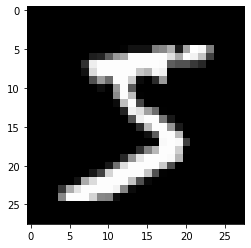

In [22]:
import matplotlib.pyplot as plt
img, label = train_dataset[0]
img = img.reshape(28, 28)
plt.imshow(img, cmap = "gray")
print("label: ", label)

label:  0


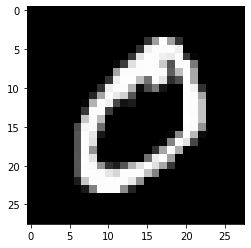

In [23]:
img, label = train_dataset[1]
img = img.reshape(28, 28)
plt.imshow(img, cmap = "gray")
print("label: ", label)

In [48]:
import seaborn as sns
import pandas as pd
labels = pd.DataFrame({"labels":train_dataset.targets})
# sns.countplot(list(labels))

In [49]:
labels["labels"].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: labels, dtype: int64

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


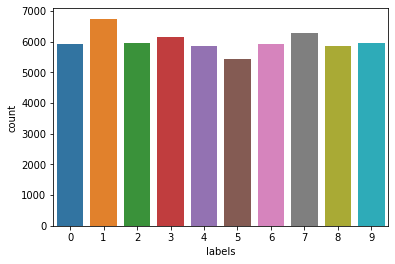

In [51]:
sns.countplot(labels["labels"])

## Make the datatset iterable(using DATA LOADER)

In [54]:
length = len(labels)
length

60000

* total length : 6000
* minibatch:  128
* iterations: 3000
    * one itertaion = one minibatch forward and backward pass
* epoch: running the whole dataset once through the model
    * 1 iteration = 1 epoch*(total_data_size)/(mini batch size)

#### defing the model paramaters

In [104]:
# n_iters means, our model wil be updates 3000 times each one due to a mini batch
n_iters = 3000
batch_size = 128
num_epochs = int(n_iters/(len(labels)/batch_size))

In [59]:
num_epochs

6

In [60]:
# loading data into mini  batches
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, 
                          batch_size = batch_size, 
                         shuffle = True) 

test_loader = DataLoader(train_dataset, 
                          batch_size = batch_size,
                         shuffle = False)

In [66]:
#checking iterability
import collections
isinstance(train_loader, collections.Iterable), isinstance(train_loader, collections.Iterable)

(True, True)

## Building Losgistic regression model

In [69]:
# here nn.Module is the parent class and Logistic_model is the child class
# calling super(Logistic_model) will enable is to call
from torch import nn
class Logistic_model(nn.Module):
    def __init__(self, input_dim, ouput_dim ):
        super(Logistic_model, self).__init__()
        self.linear = nn.Linear(input_dim, ouput_dim )
        
    def forward(self, images):
        output = self.linear(images)
        return output
    


#### creating an object of the model

In [71]:
input_dim = 28*28
output_dim = 10
model = Logistic_model(input_dim, output_dim)

#### Intantiaing the loss function


loss_fucntion we are about to define here is cross_entropy. What is does is that, lets say, we have outiput for a particulat entry to be like [0.2, 0.001, 0.3....] and the correct output label is 3. so we take the prbability corresponding to the 3 and leave the rest. We take neg-log of the probabilty and if the value is larger, worse the prediction and smaller(~0), better the prediction, then we take the averafge of all the score... and since it is a differtiable fucniton, we can use it as an objective function

#### exploring the initial paramters in depth 

In [87]:
print(model.linear.parameters())
print(list(model.parameters())[0].size())


<generator object Module.parameters at 0x7f9f25e035d0>
torch.Size([10, 784])


So here are traning the model using 2 medthods, one manually and other using the pytorch classes

## Model manually

#### model training (CPU)

In [111]:
# model entities
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()  


In [134]:

iter = 0
for epoch in range(num_epochs):
    print
    for i, (images, labels) in enumerate(train_loader):
        images  = images.view(-1, 28*28).requires_grad_()# flattening all images
        labels = labels
        
        
        # clearing all gradients in the optimizer
        optimizer.zero_grad()
        
        # doing forward pass
        outputs = model(images)
        
        # obtainig the loss for the output
        loss = criterion(outputs, labels)

        # computing the gradients wrt to weights
        loss.backward()
        # when calling loss.backward(),it updates ther .grad parameter of the weights
        # and the optimizer will automatically take the grad from it and update them
        
        # updating the paramters
        optimizer.step()
        
        iter += 1
        
        # computing the accuracy for every 500th iteration in validation dataset
        if iter%500 == 0:
            correct = 0
            total = 0
            
            for (images, labels) in test_loader:
                images = images.view(-1, 28*28).requires_grad_()
                
                outputs = model.forward(images)
                
                
                # getting the predictions
                _, predicted = torch.max(outputs, 1)
                
                total += labels.size(0)
                correct += (predicted == labels).sum()

            accuracy = (correct/total)*100
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}%'.format(iter, loss.item(), accuracy))


    if iter >= n_iters:
        break
        
        

Iteration: 500. Loss: 0.3472684621810913. Accuracy: 89.49166870117188%
Iteration: 1000. Loss: 0.4415554702281952. Accuracy: 89.51667022705078%
Iteration: 1500. Loss: 0.33199819922447205. Accuracy: 89.52666473388672%
Iteration: 2000. Loss: 0.44045090675354004. Accuracy: 89.53166961669922%
Iteration: 2500. Loss: 0.5387383103370667. Accuracy: 89.56666564941406%
Iteration: 3000. Loss: 0.32945647835731506. Accuracy: 89.59500122070312%


#### saving the model

In [133]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')